In [5]:
import sys, os, imp
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import lambda2nu, nu2lambda, c

In [6]:
# lumapiFile = "/opt/lumerical/v221/api/python/lumapi.py"
lumapiFile = "C:\\Program Files\\Lumerical\\v221\\api\\python\\lumapi.py"
lumapi = imp.load_source("lumapi", lumapiFile)
fdtdAPI = lumapi.FDTD(hide = False)

## Parameters

In [7]:
# units
um = 1e-6
nm = 1e-9

wvg_width = 500 * nm
wvg_height = 220 * nm
L_box = 2 * um
L_rect = 3 * um
space = 0.2 * um

# Solver dimensions
x_FDTD = 0
y_FDTD = 0
z_FDTD = 0
x_span_FDTD = L_box*1.5
y_span_FDTD = L_box*1.5
z_span_FDTD = 0.5*um

mesh_x = 20 * nm
mesh_y = 20 * nm
finer_mesh_size = 2.5 * um

nmbrFrqPnts = 21

In [8]:
base_optimization = fdtdAPI.load('C:/Users/alves/Documents/Photonics/final_project/Optimization_3D/forward_15.fsp')

In [9]:
fdtdAPI.switchtolayout()
fdtdAPI.select('Port_out_1')
fdtdAPI.delete()
fdtdAPI.select('monitor_field')
fdtdAPI.delete()

fdtdAPI.addpower()
fdtdAPI.set('name', 'Port_out_1')
fdtdAPI.set('monitor type', '2D x-normal')
fdtdAPI.set('x', finer_mesh_size/2.0)
fdtdAPI.set('y', wvg_width/2 + space/2)
fdtdAPI.set('y span', wvg_width*1.1)
fdtdAPI.set('z', z_FDTD)
fdtdAPI.set('z span', wvg_height*2.27)

fdtdAPI.addprofile();
fdtdAPI.set('name', 'monitor_field');
fdtdAPI.set("x", x_FDTD)
fdtdAPI.set("x span", finer_mesh_size)
fdtdAPI.set("y", y_FDTD)
fdtdAPI.set("y span", finer_mesh_size)
fdtdAPI.set("z", z_FDTD)
fdtdAPI.set("override global monitor settings", True)
fdtdAPI.set("frequency points", nmbrFrqPnts)

In [10]:
fdtdAPI.run()

C:\Users\alves\AppData\Local\Temp\ipykernel_15632\1777700022.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax1.set_title(r'%4.3f $\mu$m' % (lmbd[indxLambda] / um), fontsize=15)


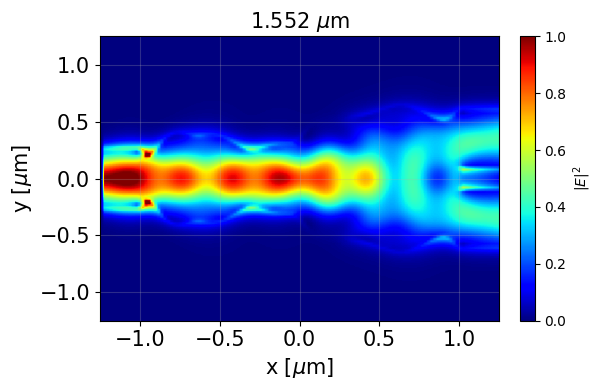

In [11]:
# Imports the electric field - abs^2.
eField = np.abs(np.squeeze(fdtdAPI.getelectric("monitor_field")))

# It shows the electric field obtained.
indxLambda = 13
x_eField = fdtdAPI.getdata("monitor_field", "x")
y_eField = fdtdAPI.getdata("monitor_field", "y")
lmbd = nu2lambda(fdtdAPI.getdata("monitor_field", "f"))
xmin = np.min(x_eField)/um
xmax = np.max(x_eField)/um
ymin = np.min(y_eField)/um
ymax = np.max(y_eField)/um

# Escala linear.
fig1 = plt.figure(figsize=(6,4))
ax1 = fig1.add_subplot(111)
im1 = ax1.imshow(np.rot90(eField[:, :, indxLambda]), cmap='jet', extent=[xmin, xmax, ymin, ymax], vmin=0, vmax=1)

colorbar = plt.colorbar(im1, fraction=0.2, pad=0.04)
colorbar.set_label(r'$|E|^2$')

ax1.set_xlabel(r'x [$\mu$m]', fontsize=15)
ax1.set_ylabel(r'y [$\mu$m]', fontsize=15)
ax1.set_title(r'%4.3f $\mu$m' % (lmbd[indxLambda] / um), fontsize=15)
ax1.grid(which='major', alpha=0.25)
plt.tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout()
ax1.set_aspect('auto')
plt.savefig('Field_Linear_3D.png', bbox_inches='tight')

plt.show()

C:\Users\alves\AppData\Local\Temp\ipykernel_15632\264736499.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax1.set_title(r'%4.3f $\mu$m' % (lmbd[indxLambda] / um), fontsize=15)


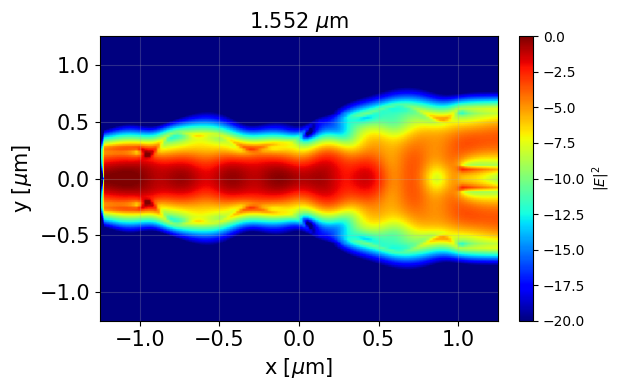

In [12]:
# Escala log.
fig2 = plt.figure(figsize=(6, 4))
ax1 = fig2.add_subplot(111)
im2 = ax1.imshow(10 * np.log10(np.rot90(eField[:, :, indxLambda])), cmap='jet', extent=[xmin, xmax, ymin, ymax], vmin=-20, vmax=0)

colorbar = plt.colorbar(im2, fraction=0.2, pad=0.04)
colorbar.set_label(r'$|E|^2$')

ax1.set_xlabel(r'x [$\mu$m]', fontsize=15)
ax1.set_ylabel(r'y [$\mu$m]', fontsize=15)
ax1.set_title(r'%4.3f $\mu$m' % (lmbd[indxLambda] / um), fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
ax1.grid(which='major', alpha=0.25)

plt.tight_layout()

ax1.set_aspect('auto')
plt.savefig('Field_Log_3D.png', bbox_inches='tight')
plt.show()


In [13]:
port = fdtdAPI.getresult("Port_out_1", "T")
# port4 = fdtdAPI.getresult("Port_out_2", "T")

T = np.abs(port['T'])
# T4 = np.abs(port4['T'])
Lambda = port['lambda']/nm

T_dB = 10*np.log10(T)
# T4_dB = 10*np.log10(T4)

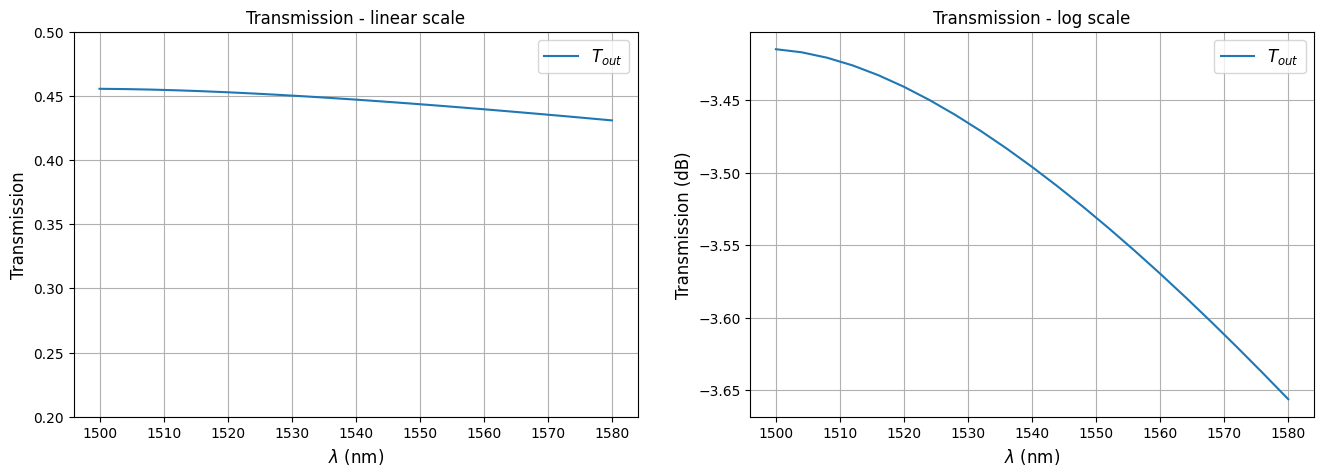

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

axs[0].plot(Lambda, T, lw=1.5, label='$T_{out}$')
axs[0].set_xlabel('$\lambda$ (nm)', fontsize=12)
axs[0].set_ylabel('Transmission', fontsize=12)
axs[0].set_title('Transmission - linear scale')
axs[0].legend(fontsize=12)
axs[0].set_ylim([0.2,0.5])
axs[0].grid()

axs[1].plot(Lambda, T_dB, lw=1.5, label='$T_{out}$')
axs[1].set_xlabel('$\lambda$ (nm)', fontsize=12)
axs[1].set_ylabel('Transmission (dB)', fontsize=12)
axs[1].set_title('Transmission - log scale')
# axs[1].set_ylim([-4,0])
axs[1].legend(fontsize=12)
axs[1].grid()

plt.savefig('Field_transmission_3D.png', bbox_inches='tight')


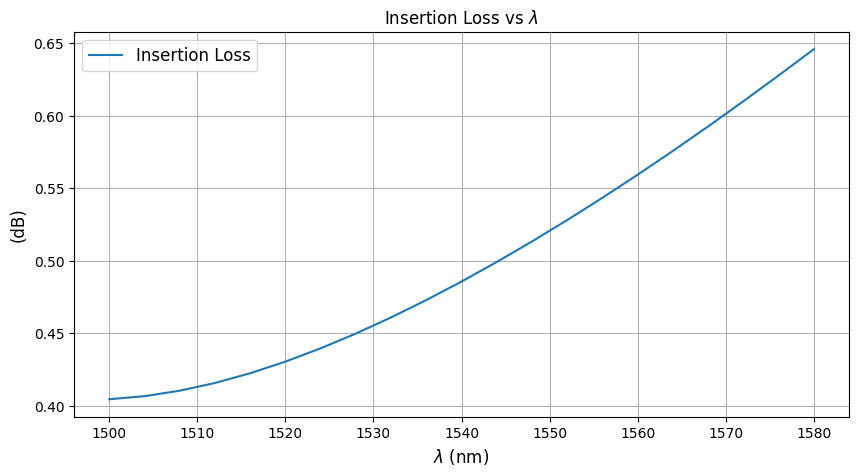

In [15]:
fig, axs = plt.subplots(figsize=(10, 5))

insertion = -10*np.log10(2*T)

axs.plot(Lambda, insertion, lw=1.5, label='Insertion Loss')
# axs.plot(Lambda/nm, T4, lw=1.5, label='$T_4$')
axs.set_xlabel('$\lambda$ (nm)', fontsize=12)
axs.set_ylabel('(dB)', fontsize=12)
axs.set_title('Insertion Loss vs $\lambda$')
axs.legend(fontsize=12)
# axs.set_ylim([0,0.5])
axs.grid()

plt.savefig('InsertionLoss_3D', bbox_inches='tight')

C:\Users\alves\AppData\Local\Temp\ipykernel_15632\110861452.py:13: UserWarning: Using the axes or figure transform requires a bounding box in the respective coordinates. Using bbox_to_anchor=(0, 0, 1, 1) now.
  axins = inset_axes(axs, width="30%", height="40%", loc="center", bbox_transform=axs.transAxes)


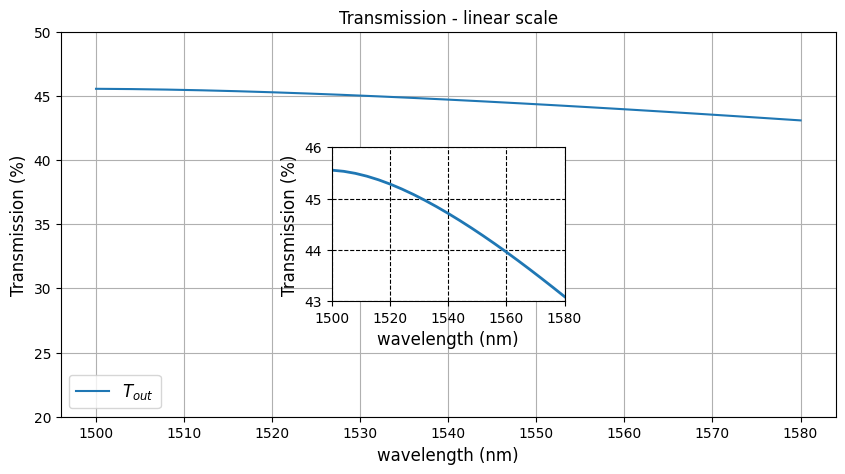

In [29]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

fig, axs = plt.subplots(figsize=(10, 5))

axs.plot(Lambda, T*100, lw=1.5, label='$T_{out}$')
axs.set_xlabel('wavelength (nm)', fontsize=12)
axs.set_ylabel('Transmission (%)', fontsize=12)
axs.set_title('Transmission - linear scale')
axs.legend(loc='lower left', fontsize=12)
axs.set_ylim([20,50])
axs.grid()

axins = inset_axes(axs, width="30%", height="40%", loc="center", bbox_transform=axs.transAxes)


axins.plot(Lambda, T*100, lw=2, label="$T_{out}$")
axins.set_xlim(1500, 1580)  
axins.set_ylim(43, 46)  
axins.grid(True, color='black', linestyle='--')  
axins.set_xlabel('wavelength (nm)', fontsize=12)
axins.set_ylabel('Transmission (%)', fontsize=12)
# axins.set_yticks(np.arange(0.42, 0.44, step=0.005))
# axins.set_xticks(np.arange(1545, 1555, step=2.5)) 

# mark_inset(axs, axins, loc1=2, loc2=3, fc="none", ec="1")

plt.savefig('Transmission_3D_zoom')

In [16]:
fdtdAPI.switchtolayout()